In [34]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import pickle

In [35]:
con = sqlite3.connect("./movies.db")

In [75]:
features = pd.read_sql("SELECT * FROM features", con, index_col=None)
features

,id,title,open,nation,producer,distributor,grade,genre,director,actors,accum_audience,accum_play
0,00000,국제시장,2014-12-17,한국,"(주)제이케이필름,씨제이이앤엠(주)",씨제이이앤엠(주),12세이상관람가,드라마,윤제균,"황정민,김윤진,오달수,정진영,장영남,라미란,김슬기,정영기,맹세창,김동원,김현중,김지...",6088876,121217
1,00001,테이큰 3,2015-01-01,미국,None,이십세기폭스코리아(주),15세이상관람가,"액션,범죄,스릴러",올리비에 메가턴,"리암 니슨,팜케 얀센,매기 그레이스,존 그리스,포레스트 휘테커",731242,20920
2,00002,마다가스카의 펭귄,2014-12-31,미국,None,씨제이이앤엠(주),전체관람가,"애니메이션,코미디,어드벤처,가족","에릭 다넬,사이몬 J.스미스","베네딕트 컴버배치,존 말코비치,톰 맥그라스,크리스 밀러,크리스토퍼 나이츠,켄 정",690824,16250
3,00003,"님아, 그 강을 건너지 마오",2014-11-27,한국,아거스필름,"CGV아트하우스,(주)대명문화공장",전체관람가,다큐멘터리,진모영,"조병만,강계열",353377,14925
4,00004,언브로큰,2015-01-07,미국,None,유니버설픽쳐스인터내셔널 코리아(유),15세이상관람가,"액션,드라마,전쟁",안젤리나 졸리,"잭 오코넬,도널 글리슨,가렛 헤드룬드,핀 위트록",256475,10780
5,00005,패딩턴,2015-01-07,영국,None,롯데쇼핑㈜롯데엔터테인먼트,전체관람가,"코미디,가족,어드벤처",폴 킹,"니콜 키드먼,벤 위쇼,휴 보네빌,샐리 호킨스",302759,9727
6,00006,기술자들,2014-12-24,한국,(주)트리니티엔터테인먼트,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,"범죄,액션",김홍선,"김우빈,김영철,고창석,이현우,조윤희,임주환,조달환,권지훈,김원진,노선식,박갑진,유원...",227879,8068
7,00007,워킹걸,2015-01-07,한국,"(주)홍필름,(주)수필름",메가박스중앙(주)플러스엠,청소년관람불가,"코미디,멜로/로맨스",정범식,"조여정,클라라,김태우,배유람,정범식,정범식,박주희,백경인,조은영,손진우,배성우,유찬...",147328,7067
8,00008,호빗: 다섯 군대 전투,2014-12-17,미국,None,워너브러더스 코리아(주),12세이상관람가,"어드벤처,판타지",피터 잭슨,"마틴 프리먼,이안 맥켈런,리차드 아미티지,케이트 블란쳇,올랜도 블룸,크리스토퍼 리,...",81669,2597
9,00009,타임 패러독스,2015-01-07,호주,None,(유)조이앤시네마,15세이상관람가,"SF,스릴러","마이클 스피어리그,피터 스피어이그","에단 호크,노아 테일러,사라 스누크",76717,4328


In [76]:
target_df = features[features['title'].isin(['너의 결혼식', '나를 차버린 스파이', '물괴'])]
target_df

,id,title,open,nation,producer,distributor,grade,genre,director,actors,accum_audience,accum_play
11756,11756,너의 결혼식,2018-08-22,한국,"(주)필름케이,(주)외유내강",메가박스중앙(주)플러스엠,12세이상관람가,멜로/로맨스,이석근,"박보영,김영광,강기영,장성범,고규필,서은수,차엽,안길강",2584213,82751
11949,11949,나를 차버린 스파이,2018-08-22,미국,None,(주)누리픽쳐스,None,"액션,코미디",수잔나 포겔,"밀라 쿠니스,케이트 맥키넌",260506,12622
12208,12208,물괴,2018-09-12,한국,(주)태원엔터테인먼트,"롯데컬처웍스(주)롯데엔터테인먼트,씨네그루(주)키다리이엔티",15세이상관람가,"액션,사극",허종호,"김명민,김인권,이혜리,최우식,박성웅,박희순,이경영",7437,52


In [77]:
from datetime import datetime,timedelta
from pandas import Series, DataFrame

def convert(s):
    return datetime.strptime(s, '%Y-%m-%d').date()
 
data_ = []
for rows in target_df.iterrows():
    tmp = pd.read_sql("SELECT * FROM "+ "'" +rows[1][0]+ "'", con, index_col=None)
    tmp.drop_duplicates(['date'], inplace=True)
    
    now = convert(rows[1][2])
    L=[]
    L=pd.date_range(start = now - timedelta(days=22),end= now + timedelta(days=40))

    df = pd.DataFrame(index=range(63))
    df[:]="0"
    df['date']=L.strftime("%Y-%m-%d")
    df.set_index(df['date'], inplace=True)
    
    
    tmp.set_index(tmp['date'], inplace=True)
    tmp=tmp[tmp['date']<=(convert(rows[1][2])+ timedelta(days=40)).strftime("%Y-%m-%d")]
    tmp=tmp[tmp['date']>=(convert(rows[1][2])- timedelta(days=22)).strftime("%Y-%m-%d")]


    df_merged = pd.merge(df,tmp, how="outer")
    df_merged.isnull()

    df_merged[df_merged.isnull()] = 0
    
    df_merged['audience'] = pd.to_numeric(df_merged['audience'].str.replace(',',''), errors='coerce', downcast='float')
    df_merged['play'] = pd.to_numeric(df_merged['play'].str.replace(',',''), errors='coerce', downcast='float')
    df_merged=df_merged.fillna(0)

    a_tmp = np.concatenate((df_merged['audience'],df_merged['play'])).reshape((2,-1)).T
    
    print(df_merged)

        
    data_.append(a_tmp)


          date  audience    play
0   2018-07-31       0.0     0.0
1   2018-08-01       0.0     0.0
2   2018-08-02    2819.0    13.0
3   2018-08-03       0.0     0.0
4   2018-08-04       0.0     0.0
5   2018-08-05       0.0     0.0
6   2018-08-06    1328.0     8.0
7   2018-08-07    4215.0    19.0
8   2018-08-08    1750.0     5.0
9   2018-08-09    2000.0    11.0
10  2018-08-10       0.0     0.0
11  2018-08-11       0.0     0.0
12  2018-08-12       0.0     0.0
13  2018-08-13     817.0     3.0
14  2018-08-14    1744.0     7.0
15  2018-08-15       0.0     0.0
16  2018-08-16    3782.0    15.0
17  2018-08-17     536.0     4.0
18  2018-08-18    2279.0     8.0
19  2018-08-19    2296.0    10.0
20  2018-08-20    3244.0    17.0
21  2018-08-21    3270.0    21.0
22  2018-08-22   99312.0  3456.0
23  2018-08-23   76642.0  3389.0
24  2018-08-24  143085.0  3737.0
25  2018-08-25  280022.0  4344.0
26  2018-08-26  271060.0  4350.0
27  2018-08-27  104232.0  4151.0
28  2018-08-28  106710.0  4173.0
29  2018-0

C:\Users\Administrator\PycharmProjects\stock\env\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [78]:
data = np.array(data_)
data.shape

(3, 63, 2)

In [79]:
dday = [i for i in range(-22, 41)]

d_data = []

for i in data:
    d_data.append(np.column_stack((i, dday)))

d_data = np.array(d_data)
np.shape(d_data)

(3, 63, 3)

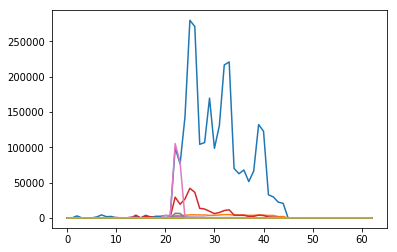

In [80]:
for i in range(3):
    plt.plot(d_data[i])

In [81]:
real_target = []
real_target.append(d_data[0][22:45])
real_target.append(d_data[1][22:45])
real_target.append(d_data[2][1:24])
real_target = np.array(real_target)
real_target.shape

(3, 23, 3)

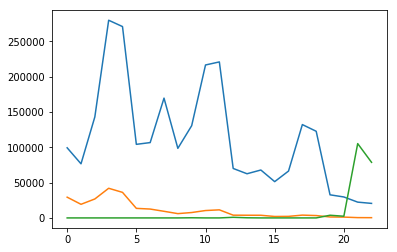

In [82]:
for i in range(3):
    plt.plot(real_target[i,:,0])

In [83]:
real_target[0]

array([[9.93120e+04, 3.45600e+03, 0.00000e+00],
       [7.66420e+04, 3.38900e+03, 1.00000e+00],
       [1.43085e+05, 3.73700e+03, 2.00000e+00],
       [2.80022e+05, 4.34400e+03, 3.00000e+00],
       [2.71060e+05, 4.35000e+03, 4.00000e+00],
       [1.04232e+05, 4.15100e+03, 5.00000e+00],
       [1.06710e+05, 4.17300e+03, 6.00000e+00],
       [1.69690e+05, 3.53500e+03, 7.00000e+00],
       [9.85550e+04, 3.73100e+03, 8.00000e+00],
       [1.30651e+05, 4.06400e+03, 9.00000e+00],
       [2.16653e+05, 4.72000e+03, 1.00000e+01],
       [2.20981e+05, 4.60300e+03, 1.10000e+01],
       [7.00570e+04, 4.07900e+03, 1.20000e+01],
       [6.25590e+04, 4.04300e+03, 1.30000e+01],
       [6.78620e+04, 4.02400e+03, 1.40000e+01],
       [5.13890e+04, 3.55000e+03, 1.50000e+01],
       [6.63880e+04, 3.68600e+03, 1.60000e+01],
       [1.32226e+05, 4.05000e+03, 1.70000e+01],
       [1.22728e+05, 3.96400e+03, 1.80000e+01],
       [3.27150e+04, 3.47500e+03, 1.90000e+01],
       [2.96760e+04, 3.48200e+03, 2.0000

In [84]:
real_target = np.array(real_target)

### for seq2seq

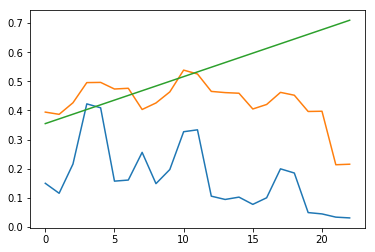

In [86]:
scaler = pickle.load(open('./scaler/scaler_input_seq.sav', 'rb'))
norm_real_target = scaler.transform(real_target.reshape(-1,3))
norm_real_target = norm_real_target.reshape(3,23,3)

plt.plot(norm_real_target[0][:])

np.save('./npy/real_target_seq.npy', norm_real_target)

### for Basic_RNN

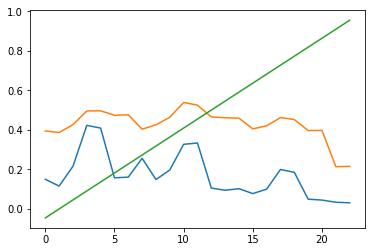

In [90]:
scaler = pickle.load(open('./scaler/scalerX_23.sav', 'rb'))
norm_real_target = scaler.transform(real_target.reshape(-1,3))
norm_real_target = norm_real_target.reshape(3,23,3)
plt.plot(norm_real_target[0])

np.save('./npy/real_target_23.npy', norm_real_target[:2])